In [2]:
%pip install -qU openai
%pip install -qU PyMuPDF
%pip install -qU tiktoken

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import tiktoken
import config

In [ ]:
import openai
openai.api_key ="blah"

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo", 
  messages=[{"role": "user", "content": "How to pass the interview?"}]
)
completion['choices'][0]['message']['content']


"As an AI language model, I cannot advise or give guidance on how to pass interviews. However, here are some general tips that may help:\n\n1. Research the company and the job position you are applying for. Know their values, mission, and vision. This will help you prepare better for the interview.\n\n2. Prepare for common interview questions and practice your responses. This will help build your confidence and ensure that you can communicate effectively.\n\n3. Dress appropriately and arrive at the interview location at least 10 minutes early. Punctuality is important and demonstrates that you respect the interviewer's time.\n\n4. Listen attentively to the interviewer and make sure you answer their questions directly and concisely.\n\n5. Highlight your strengths, experience, and qualifications that match the job requirements.\n\n6. Be honest, respectful, and courteous throughout the interview.\n\n7. Finally, make sure you ask some thought-provoking and relevant questions about the job 

In [6]:
import fitz

In [7]:
doc1 = fitz.open('439_multi_robot_scene_completion_t.pdf')
text1 = ""
for page in doc1:
 text1+=page.get_text()
text1

'Multi-Robot Scene Completion:\nTowards Task-Agnostic Collaborative Perception\nYiming Li∗\nNew York University\nyimingli@nyu.edu\nJuexiao Zhang∗\nNew York University\njuexiao.zhang@nyu.edu\nDekun Ma\nNew York University\ndm4524@nyu.edu\nYue Wang\nMassachusetts Institute of Technology\nyuewang@csail.mit.edu\nChen Feng†\nNew York University\ncfeng@nyu.edu\nAbstract: Collaborative perception learns how to share information among mul-\ntiple robots to perceive the environment better than individually done. Past re-\nsearch on this has been task-speciﬁc, such as detection or segmentation. Yet this\nleads to different information sharing for different tasks, hindering the large-scale\ndeployment of collaborative perception. We propose the ﬁrst task-agnostic col-\nlaborative perception paradigm that learns a single collaboration module in a self-\nsupervised manner for different downstream tasks. This is done by a novel task\ntermed multi-robot scene completion, where each robot learns to ef

In [8]:
df1=pd.DataFrame(['0',text1]).T
df1

,0,1
0,0,Multi-Robot Scene Completion:\nTowards Task-Ag...


<Axes: >

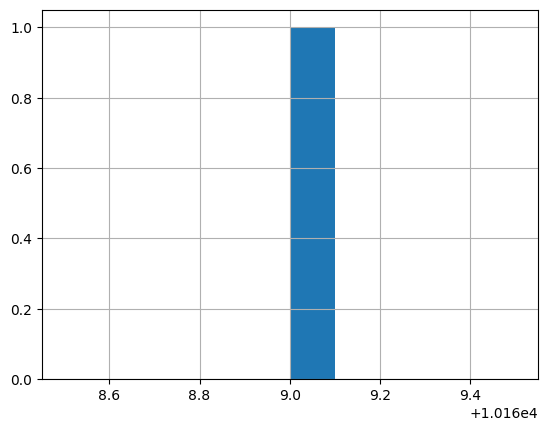

In [9]:
# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

#df = pd.read_csv('processed/scraped.csv', index_col=0)
df1.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df1['n_tokens'] = df1.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the number of tokens in the entire article 
df1.n_tokens.hist()

In [10]:
doc2 = fitz.open('V2X-SIM.pdf')
text2 = ""
for page in doc2:
 text2+=page.get_text()
text2

'IEEE ROBOTICS AND AUTOMATION LETTERS. PREPRINT VERSION. JULY, 2022\n1\nV2X-Sim: Multi-Agent Collaborative Perception\nDataset and Benchmark for Autonomous Driving\nYiming Li1, Dekun Ma1, Ziyan An1, Zixun Wang1, Yiqi Zhong2, Siheng Chen3, u, and Chen Feng1, u\nAbstract—Vehicle-to-everything (V2X) communication tech-\nniques enable the collaboration between vehicles and many other\nentities in the neighboring environment, which could fundamen-\ntally improve the perception system for autonomous driving.\nHowever, the lack of a public dataset signiﬁcantly restricts the\nresearch progress of collaborative perception. To ﬁll this gap,\nwe present V2X-Sim, a comprehensive simulated multi-agent\nperception dataset for V2X-aided autonomous driving. V2X-\nSim provides: (1) multi-agent sensor recordings from the road-\nside unit (RSU) and multiple vehicles that enable collaborative\nperception, (2) multi-modality sensor streams that facilitate\nmulti-modality perception, and (3) diverse ground 

In [11]:
df2=pd.DataFrame(['0',text2]).T
df2

,0,1
0,0,IEEE ROBOTICS AND AUTOMATION LETTERS. PREPRINT...


<Axes: >

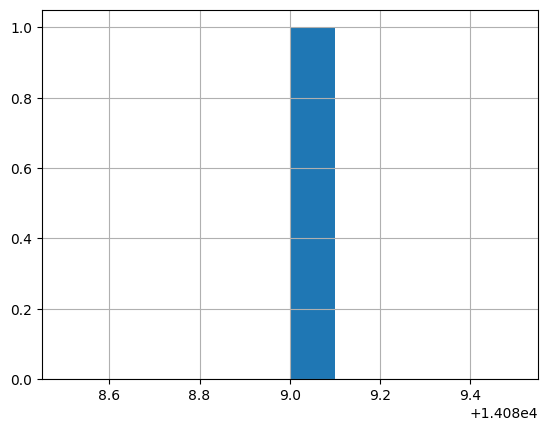

In [12]:
# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

#df = pd.read_csv('processed/scraped.csv', index_col=0)
df2.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df2['n_tokens'] = df2.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the number of tokens in the entire article 
df2.n_tokens.hist()

In [13]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks

In [15]:
shortened1 = []
shortened2 = []
# Loop through the dataframe1
for row in df1.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened1 += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened1.append( row[1]['text'] )

shortened2 = []
# Loop through the dataframe2
for row in df2.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened2 += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened2.append( row[1]['text'] )

<Axes: >

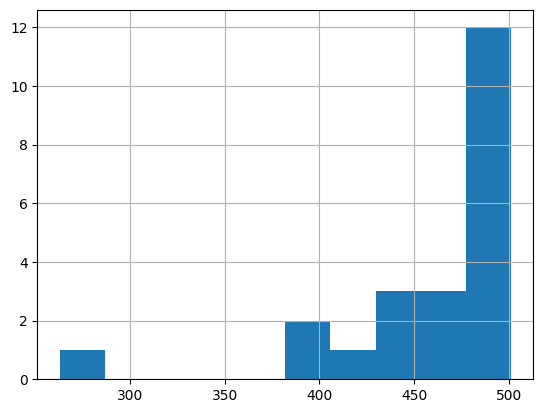

In [16]:
df1 = pd.DataFrame(shortened1, columns = ['text'])
df1['n_tokens'] = df1.text.apply(lambda x: len(tokenizer.encode(x)))
df1.n_tokens.hist()

Noted, I combined 2 pdfs first before generating the embeddings. However, I can also generate the embeddings separately and then concatenate them. 

Considerations: 

1) If the texts in the two DataFrames are unrelated or represent different contexts, it might be more appropriate to embed them separately and keep their embeddings distinct. 

2) If the texts are related or you want to capture relationships between them, concatenating the texts and then embedding the combined data may be more suitable.
```

<Axes: >

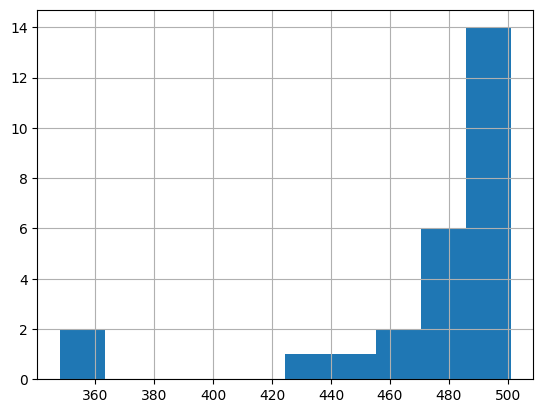

In [17]:
df2 = pd.DataFrame(shortened2, columns = ['text'])
df2['n_tokens'] = df2.text.apply(lambda x: len(tokenizer.encode(x)))
df2.n_tokens.hist()

In [18]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,text,n_tokens
0,Multi-Robot Scene Completion:\nTowards Task-Ag...,451
1,Since these intermediate features are easy to ...,499
2,"To address this\nchallenge, we further design ...",432
3,Existing works commonly\nconsider a speciﬁc do...,391
4,SSRL is generally\ncomposed of: (1) task-agnos...,496


In [19]:
df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
#df1.to_csv('embeddings1.csv')
df.head()

,text,n_tokens,embeddings
0,Multi-Robot Scene Completion:\nTowards Task-Ag...,451,"[-0.02197783626616001, -0.00578127708286047, 0..."
1,Since these intermediate features are easy to ...,499,"[-0.013097502291202545, -0.0060057369992136955..."
2,"To address this\nchallenge, we further design ...",432,"[-0.028747987002134323, -0.00900447741150856, ..."
3,Existing works commonly\nconsider a speciﬁc do...,391,"[-0.012662009336054325, 0.0021576671861112118,..."
4,SSRL is generally\ncomposed of: (1) task-agnos...,496,"[-0.01578858681023121, 0.008497853763401508, 0..."


In [20]:
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

In [21]:
def answer_question(
    df,
    question="How to show my competitiveness to interviewers?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    prompt = f"""Answer the question as truthfully as possible using the provided text, and if the answer is not contained within the text below, say "I don't know"

    Context:{context}

    Q:{question}
    A:"""
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.ChatCompletion.create(
                        model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}]
        )
        return response['choices'][0]["message"]["content"]
    except Exception as e:
        print(e)
        return ""

In [28]:
res=answer_question(df, question="How is V2X related to collabrative perception and how is multi-robot scene related to collabrative perception?", debug=False)

In [29]:
res

'V2X communication enables collaboration between vehicles and other entities in the neighboring environment and can fundamentally improve the perception system for autonomous driving through collaborative perception. The development of collaborative perception requires expertise from both the communication and perception communities. The V2X-Sim dataset is a comprehensive simulated multi-agent perception dataset for V2X-aided autonomous driving that supports various perception tasks and multi-modality perception. The dataset includes multi-agent sensor recordings from the roadside unit (RSU) and multiple vehicles that enable collaborative perception in a multi-robot scene. Thus, V2X is related to collaborative perception, and the multi-robot scene is a context for collaborative perception research.'